<img src=https://i.imgur.com/QPFf1hw.png style="float: left; margin: 10px;" > 
    
# Topic Modeling to Identify Women's Health Concerns on Online Forums

#### Author: [Jocelyn Lutes](https://www.linkedin.com/in/jocelyn-lutes/)
---
## Project Background

Citizen science is an emerging field of research in which members of the public volunteer to participate in scientific research [(1)](https://www.citizenscience.gov/about/#). One of the most well-known, crowd-sourced citizen science is projects is [American Gut](https://msystems.asm.org/content/3/3/e00031-18), a citizen science project designed to better understand the human microbiome. For this project, citizens interested in contributing to the project paid $99 to receive a sample collection kit and were given instructions to submit the sample [(2)](https://anesthesiology.duke.edu/?p=846744). Within approximately five years, it was estimated that American Gut received samples from over 11,000 people in 45 different countries [(2)](https://anesthesiology.duke.edu/?p=846744), illustrating the willingness of individualas to participate in research and the power of citizen science for generating large datasets that can answer important research questions.

The field of developmental neurotoxicology is interested in understanding the developmental origins of the nervous system throughout the lifespan [(3)](https://www.dntshome.org). Within this field, a substantial amount of research is dedicated to understanding how events that occur during a woman's pregnancy (e.g. illness, treatment with medication, psychological distress, etc.) impact the development of the baby's brain and behavior. Traditional research within the field of maternal health and infant development has relied on maternal report of any events that occurred during pregnancy through regularly-scheduled interviews with a trained research assistant or counselor. Although these interviews provide important information for the studies, the accuracy of reporting depends on the ability of the expecting mother to recall any important events that happened during her pregnancy. 

In order to eliminate any gaps in reporting and to gain a more-representative picture of a woman's pregnancy, we would like to to plan a citizen science project in which women who are interested in participating can download a mobile application that would allow them to log important events during their pregnancy in real time. However, understanding that this will be a large time commitment for participating women, we would also like to provide them with specially curated resources related to women's health concerns. 

## Problem Statement

In order to ensure that any resources that are provided in the application are relevant to potential users, the project leads have proposed that we use an open-ended survey or multiple focus groups to identify several women's health concerns. However, surveys and focus groups can be costly in terms of both time and money, and the project is operating on a limited budget and needs to be completed as quickly as possible. Additionally, it is possible that the small number of women who would be invited to join a focus group or to receive a survey would not be representative of the larger population of women who could opt to particpate in the research. Therefore, the data science team was tasked to uncover an alternate way to identify women's health concerns.

In this project, **I will use natural language processing and unsupervised techniques, such as clustering and topic modeling, to identify women's health concerns from posts in online forums.** Specific concerns will be identified for general women's health, fertility and pregnancy, and postpartum/early parenthood.

## Executive Summary
### Data Collection
Data was collected on August 7, 2020 using the [Pushshift Reddit API](https://github.com/pushshift/api). This API allows for easy aggregation of posts from Reddit.com. For each health domain, data was collected that spanned from August 7, 2020 to February 16, 2019 (a period of approximately 17.5 months).    

**1. General Women's Health Data:**  
* Posts relating to general women's health concerns were collected from [r/WomensHealth](https://www.reddit.com/r/WomensHealth/), [r/obgyn](https://www.reddit.com/r/obgyn/), and [r/thegirlsurvivalguide](https://www.reddit.com/r/TheGirlSurvivalGuide/). 
* This resulted in a total of 31,385 posts from 19,753 unique users.

**2. Fertility and Pregnancy Data:**  
* Posts relating to fertility and pregnancy were collected from [r/TryingForABaby](https://www.reddit.com/r/TryingForABaby/), [r/pregnant](https://www.reddit.com/r/pregnant/), and [r/BabyBumps]https://www.reddit.com/r/BabyBumps/). 
* This resulted in a total of 98,138 posts from 35,127 unique users.

**3. Postpartum and Early Parenthood Data:**
* Posts relating to the postpartum period and early parenthood were collected from [r/beyondthebump](https://www.reddit.com/r/beyondthebump/), [r/postpartumdepression](https://www.reddit.com/r/postpartumdepression/), and [r/breastfeeding](https://www.reddit.com/r/breastfeeding/).
* This resulted in a total of 51,674 posts from 21,585 unique users.

### Data Cleaning and Preprocessing
Once data was in hand, all data was cleaned to check for missing values and inappropriate data types. HTML tags, Reddit-specific tags (e.g. "[removed]", "[deleted]"), URLs, and digits were removed from the text. 

Once the data was cleaned, a custom list of stop words was defined, and posts were lemmatized using ***spaCy***. (Lemmatization refers to the process of reducing a word to its base root.) 

Prior to modeling, a document term matrix was created using the tf-idf vectorizer by ***sklearn***. (Tf-idf creates a bag of words with a weight for each word that is based upon the number of times a word appears in a post and the number of posts that it appears in. If a word appears in many documents, it will receive a low ranking.) If a ***gensim*** model was used, the document term matrix was further processed to create a ***gensim*** corpus. 

### Topic Modeling
NOT YET COMPLETED - I will update this once I have finalized the models. I think that I will most likely have KMeans Clustering and LDA. I might also try Hierarchical Clustering and NNMF.

## Table of Contents
* Imports 
* Data
* Data Cleaning
* Text Preprocessing
* Exploratory Data Analysis
* Model Preparation
* Topic Modeling with Latent Dirichlet Allocation
* Topic Interpretation
* Conclusions and Recommendations

## Imports

In [161]:
# Standard Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Better Profanity
from better_profanity import profanity

# Gensim
from gensim import matutils
from gensim import corpora
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel
from gensim.models import CoherenceModel

# NLTK
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

# pyLDAvis
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

# re
import re

# Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Scipy
import scipy.sparse


# spaCy
import spacy
nlp = spacy.load('en_core_web_sm')

# Silence Future Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

#### Define Color Palette

In [209]:
blush = '#F7D1CD'
pink = '#E8C2CA'
light_purple = '#D1B3C4'
medium_purple = '#B392AC'
dark_purple = '#B392AC'
warm_grey = '#8E9AAF'
light_blue = '#a8dadc'

## Data

### Read-In Data from CSV

In [121]:
health = pd.read_csv('../data/womens_health.csv', index_col = 'Unnamed: 0')
obsgyn = pd.read_csv('../data/fertility_and_pregnancy.csv', index_col = 'Unnamed: 0')
pospar = pd.read_csv('../data/postpartum.csv', index_col = 'Unnamed: 0')

### Check Head and Shape of Each Data Set
Before cleaning the data, I want to check the head and shape of each data set. This will allow me to see which columns were scraped using the Pushshift API and to assess the size of each data set.

#### General Women's Health Data

In [3]:
health.head(1)

,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,timestamp
0,Been to the clinic twice and they don’t know w...,So I’ve been having problems with discharge an...,WomensHealth,1596818251,thecrazedbunny,0,1,True,2020-08-07


In [4]:
health.shape

(31385, 9)

For the general women's health data, before cleaning there are 31,385 posts.

#### Fertility and Pregnancy Data

In [5]:
obsgyn.head(1)

,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,timestamp
0,Adding to the kitchen sink approach: I just bo...,This time I’m going to be using a menstrual cu...,TryingForABaby,1596839749,lastput1,7,1,True,2020-08-07


In [6]:
obsgyn.shape

(98138, 9)

Prior to cleaning, the fertility and pregnancy data set has 98,138 posts.

#### Pospartum and Early Parenthood Data

In [7]:
pospar.head(1)

,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,timestamp
0,Question about bottles,I'm researching baby bottles and am trying to ...,BabyBumps,1596850138,All_Hail_CC,4,1,True,2020-08-07


In [8]:
pospar.shape

(51674, 9)

Prior to cleaning, the raw postpartum and early parenthood data set has 51,674 rows.

## Data Cleaning

### Combine `title` and `selftext` columns into a `total_text` column

Before beginning to clean the text data, it is important to clean the columns that are included in the data frame. 

The format of a Reddit post consists of a post title (`title`), and there is also an opportunity to write a body of text (`selftext`). For this project, I will be interested in analyzing all text in a post, so I will combine all of the text into a `total_text` column.

#### Function

In [9]:
def create_total_text(df):
    df['total_text'] = df['title'] + ' ' + df['selftext']
    df.drop(columns = ['title', 'selftext'], inplace = True)
    return df.head(1)

#### Implementation for All Data Sets

In [10]:
create_total_text(health)
create_total_text(obsgyn)
create_total_text(pospar)

,subreddit,created_utc,author,num_comments,score,is_self,timestamp,total_text
0,BabyBumps,1596850138,All_Hail_CC,4,1,True,2020-08-07,Question about bottles I'm researching baby bo...


### Drop Unnecessary Columns

For this project, I am interested in using topic modeling to identify areas of concern for each domain of women's health. Therefore, the number of comments and score of each post will not be relevant and will be removed. Because the date is included under `timestamp`, the `created_utc` column will also be removed. The `is_self` column is also not needed and will be removed.

#### Function

In [11]:
def clean_columns(df):
    df.drop(columns = ['created_utc', 'num_comments', 'score', 'is_self'], inplace = True)

#### Implementation for All Data Sets

In [12]:
clean_columns(health)
clean_columns(obsgyn)
clean_columns(pospar)

### Check for Null/Missing Values

#### Function

In [13]:
def display_percent_null(df):
    '''Returns the percent of values in each column that are null or missing'''
    return (df.isna().sum()/len(df)) * 100

#### Implementation for All Data Sets

In [14]:
display_percent_null(health)

subreddit     0.000000
author        0.000000
timestamp     0.000000
total_text    2.450215
dtype: float64

In [15]:
display_percent_null(obsgyn)

subreddit     0.000000
author        0.000000
timestamp     0.000000
total_text    1.566162
dtype: float64

In [16]:
display_percent_null(pospar)

subreddit     0.000000
author        0.000000
timestamp     0.000000
total_text    1.563649
dtype: float64

### Drop Missing Data

Above, we saw that each dataframe is missing some data in the `total_text` column. Because we can not analyze posts without text, any rows with missing data will be removed.

In [17]:
health.dropna(inplace = True)
obsgyn.dropna(inplace = True)
pospar.dropna(inplace = True)

### Check Data Types

#### Women's Health Data

In [18]:
health.dtypes

subreddit     object
author        object
timestamp     object
total_text    object
dtype: object

#### Fertility and Pregnancy Data

In [19]:
obsgyn.dtypes

subreddit     object
author        object
timestamp     object
total_text    object
dtype: object

#### Postpartum Data

In [20]:
pospar.dtypes

subreddit     object
author        object
timestamp     object
total_text    object
dtype: object

### Convert `Timestamp` column to a datetime object

#### Function

In [21]:
def convert_to_datetime(df, column):
    df[column] = pd.to_datetime(df[column])
    return df.dtypes

#### Implementation for All Data Sets

In [22]:
convert_to_datetime(health, 'timestamp')
convert_to_datetime(obsgyn, 'timestamp')
convert_to_datetime(pospar, 'timestamp')

subreddit             object
author                object
timestamp     datetime64[ns]
total_text            object
dtype: object

## Text Cleaning
In order to reduce the dimensionality of our text vectors, it is important that only text that will contribute meaning remains in the vector. To do this, we will remove any text that is not believed to contribut meaning to the post.

#### Functions

In [23]:
def remove_string(df, column, string):
    df[column] = df[column].str.replace(string, '')


def replace_string(df, column, string, replacement):
    df[column] = df[column].str.replace(string, replacement)

#### [removed]
If moderators of the subreddit feel that the post violates one or more of the subreddit's rules, they will remove content of the post and replace it with a "[removed]" tag. Because the [removed] tags will not add any valuable information to the post, these will be removed from posts.

In [24]:
remove_string(health, 'total_text', '\[removed\]')
remove_string(obsgyn, 'total_text', '\[removed\]')
remove_string(pospar, 'total_text', '\[removed\]')

<>:1: DeprecationWarning: invalid escape sequence \[
<>:2: DeprecationWarning: invalid escape sequence \[
<>:3: DeprecationWarning: invalid escape sequence \[
<>:1: DeprecationWarning: invalid escape sequence \[
<>:2: DeprecationWarning: invalid escape sequence \[
<>:3: DeprecationWarning: invalid escape sequence \[
<>:1: DeprecationWarning: invalid escape sequence \[
<>:2: DeprecationWarning: invalid escape sequence \[
<>:3: DeprecationWarning: invalid escape sequence \[
<ipython-input-24-af024eb84b70>:1: DeprecationWarning: invalid escape sequence \[
  remove_string(health, 'total_text', '\[removed\]')
<ipython-input-24-af024eb84b70>:2: DeprecationWarning: invalid escape sequence \[
  remove_string(obsgyn, 'total_text', '\[removed\]')
<ipython-input-24-af024eb84b70>:3: DeprecationWarning: invalid escape sequence \[
  remove_string(pospar, 'total_text', '\[removed\]')


#### \n
This is a symbol that indicates a new line. Because we are only interested in the text itself, this tag will be removed.

In [25]:
remove_string(health, 'total_text', '\n')
remove_string(obsgyn, 'total_text', '\n')
remove_string(pospar, 'total_text', '\n')

#### &amp ;

Sometimes, the '&' symbol is not displayed, and the HTML reference `&amp;` shows up instead. This text will be removed.

In [26]:
remove_string(health, 'total_text', '&amp;')
remove_string(obsgyn, 'total_text', '&amp;')
remove_string(pospar, 'total_text', '&amp;')

#### &gt ;
Some times, the greater than symbol (>) is not properly displayed, and the HTML reference `&gt;` shows up in its place. I will remove this HTML reference.

In [27]:
remove_string(health, 'total_text', '&gt;')
remove_string(obsgyn, 'total_text', '&gt;')
remove_string(pospar, 'total_text', '&gt;')

#### &lt ;
Some times, the less than symbol (<) is not properly displayed, and the HTML reference `&lt;` shows up in its place. I will remove this HTML reference.

In [28]:
remove_string(health, 'total_text', '&lt;')
remove_string(obsgyn, 'total_text', '&lt;')
remove_string(pospar, 'total_text', '&lt;')

#### TL;DR
"TL;DR" is an abbreviation that stand for "Too long; Didn't read" and is meant to provide a brief synopsis of the post. Because these letters will not provide any meaningful inormation, they will be removed.

In [29]:
remove_string(health, 'total_text', 'TL;DR')
remove_string(obsgyn, 'total_text', 'TL;DR')
remove_string(pospar, 'total_text', 'TL;DR')

#### [deleted]

In [30]:
remove_string(health, 'total_text', 'deleted')
remove_string(obsgyn, 'total_text', 'deleted')
remove_string(pospar, 'total_text', 'deleted')

#### Remove Website URLs

Prior to being able to remove the urls, I will need to reset the indices so that they are in numerical order from 0 to len(data frame). This will allow me to use `.loc` to edit the specific strings in the data frame.

In [31]:
health.reset_index(drop = True, inplace = True)
obsgyn.reset_index(drop = True, inplace = True)
pospar.reset_index(drop = True, inplace = True)

##### Functions

In [32]:
def remove_urls(df, column):
    for i in range(0, len(df)):
        df.loc[i, column] = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', df.loc[i, column])
        
# Regex Code by Lee Martin (Stack Overflow post)
# https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python/11332580        

In [33]:
def delete_empty_text(df, column):
    df = df[df[column] != '']

##### Remove URLs from all data sets

In [34]:
remove_urls(health, 'total_text')
remove_urls(obsgyn, 'total_text')
remove_urls(pospar, 'total_text')

##### Check to see if removing URLs resulted in any null 'total_text'; If so, remove it.

In [35]:
delete_empty_text(health, 'total_text')
delete_empty_text(obsgyn, 'total_text')
delete_empty_text(pospar, 'total_text')

#### Remove Posts by AutoModerator

During EDA, I discovered that several of the subreddits used for data collection have an "AutoModerator" user that makes several posts. Because this user does not represent a woman who is interested in asking a health-related question, I will remove all posts from this user.

##### Functions

In [36]:
def remove_AutoModerator(df, column):
    df = df[df[column] != 'AutoModerator']
    return df

##### Implementation for all data sets

In [37]:
health = remove_AutoModerator(health, 'author')
obsgyn = remove_AutoModerator(obsgyn, 'author')
pospar = remove_AutoModerator(pospar, 'author')

#### Remove Digits

##### Function

In [38]:
def remove_digits(df, column1):
    df[column1] = df[column1].str.replace('[0-9]+', '', regex = True)
    
# https://stackoverflow.com/questions/47010044/how-to-remove-numeric-characters-present-in-countvectorizer

##### Implementation for All Data Sets

In [39]:
dfs = [health, obsgyn, pospar]

for df in dfs:
    remove_digits(df, 'total_text')

#### Edit "C-section" so that it is not split by the tokenizer

In [40]:
replace_string(obsgyn, 'total_text', 'c-section', 'csection')
replace_string(obsgyn, 'total_text', 'C-section', 'csection')
replace_string(pospar, 'total_text', 'c-section', 'csection')
replace_string(obsgyn, 'total_text', 'C-section', 'csection')

## Text Preprocessing

#### Define Stop Words

##### Functions

In [122]:
def add_stop_words(word_list, list_stop_words):
    for word in word_list:
        list_stop_words.add(word)
        
def remove_stop_words(word_list, list_stop_words):
    for word in word_list:
        list_stop_words.remove(word)

##### Stop Words

In [123]:
# spaCy stop words
stop_words_spacy = set(nlp.Defaults.stop_words)

# NLTK stop words
stop_words_nltk = set(stopwords.words('english'))

# Combined list
full_stop_words = stop_words_spacy.union(stop_words_nltk)

In [124]:
words_to_add = ['like', 'know', 'want', 'feel', 'going', 'think', 'reddit', 'imgur', 'pron', 'officially']

add_stop_words(words_to_add, full_stop_words)

#### Engineer a Word Count Feature

##### Function

In [44]:
def get_word_count(df, column, new_column = 'word_count'):
    df[new_column] = df[column].apply(lambda x: len(x.split()))
    return df.head(1)

##### Add a Word Count column to each data set

In [45]:
get_word_count(health, 'total_text')
get_word_count(obsgyn, 'total_text')
get_word_count(pospar, 'total_text')

,subreddit,author,timestamp,total_text,word_count
0,BabyBumps,All_Hail_CC,2020-08-07,Question about bottles I'm researching baby bo...,43


#### Create a Lemmatized Text Column

##### Reset Indices

In [46]:
health = health.reset_index(drop = True)
obsgyn = obsgyn.reset_index(drop = True)
pospar = pospar.reset_index(drop = True)

##### Function

In [47]:
def tokenize_and_lemma(df, column, stop_words = full_stop_words):
    nlp = spacy.load('en_core_web_sm')
    
    lemma_tokens = []
    
    for post in df[column]:
        doc = nlp(post) # Run text through spaCy pipeline
        tokens = [token for token in doc if token.text not in stop_words]
        lemma_tokens.append([token.lemma_ for token in tokens])

    df['lemma_text'] = [' '.join(post) for post in lemma_tokens] # join tokens back together into string for use in vectorizer
        
    return df.head()

##### Add a Lemmatized Text column to each data set

In [48]:
%%time
dfs = [health, obsgyn, pospar]

for df in dfs:
    print(f'Using spaCy to lemmatize text in {df}!')
    tokenize_and_lemma(df, 'total_text') 

#### Engineer a Sentiment Analysis Feature

##### Function

In [49]:
def analyze_sentiment(df, column, new_column = 'sentiment_score', score = 'compound'):
    sent_anal = SentimentIntensityAnalyzer()
    sentiment_scores = [sent_anal.polarity_scores(post)[score] for post in df[column]]
    df[new_column] = sentiment_scores
    return df.head()

##### Create a Sentiment Composite Column in each Data Frame

In [50]:
for df in dfs:
    print(f'Using VADER to analyze sentiment for posts in {df}!')
    analyze_sentiment(df, 'total_text')

In [ ]:
print(health.shape)
print(obsgyn.shape)
print(pospar.shape)

## Exploratory Data Analysis

### How many unique authors are there per subject matter?

One of the reasons why we believe that using an online health forum to identify women's health concerns could be better than a focus group or targeted survey is because of the scope of people that we will be able to reach. Here, we will explore how many women voiced their concerns for each of the topics of interest.

If it appears that several users have authored multiple posts, I will also examine these posts to eliminate the chances of including advertisements or spam in my analyses.

#### Function

In [52]:
def unique_authors(df, column, title):
    return f'{title} has {df[column].nunique()} unique authors.'

#### General Women's Health Data

In [53]:
unique_authors(health, 'author', 'Women\'s Health')

"Women's Health has 19753 unique authors."

In terms of general women's health concerns, we have posts from 19,753 unique users. Because there are 31,385 total posts, this means that 11,361 posts were contributed by a duplicate user.

#### Fertility and Pregnancy Data

In [54]:
unique_authors(obsgyn, 'author', 'Fertility and Pregnancy')

'Fertility and Pregnancy has 35127 unique authors.'

The Fertility and Pregnancy data (`obsgyn`) has 98,138 total posts, but only 35,517 are unique. This means that 62,621 posts are by duplicate authors. 

#### Postpartum and Early Parenthood Data

In [55]:
unique_authors(pospar, 'author', 'Postpartum')

'Postpartum has 21585 unique authors.'

The postpartum data has posts that were authored by 21,821 unique users. Because there are 51,674 total posts in the data frame, this means that 29,853 posts are by duplicate authors. 

### Word Count Distributions

#### Function

In [56]:
def subplot_histogram(data, axis, title = None, x_label = None, y_label = None, color = None):
    sns.distplot(data, ax = axis, kde = False, hist_kws=dict(edgecolor="k", linewidth=.9, alpha = 0.9), color = color)
    axis.set_title(title, pad = 8, fontdict = {'fontsize':14})
    axis.set_xlabel(x_label, labelpad = 6, fontdict = {'fontsize':13})
    axis.set_ylabel(y_label, labelpad = 6, fontdict = {'fontsize':13})
    axis.tick_params(axis = 'both', labelsize = 11)
    plt.tight_layout();

#### Word Count Distributions

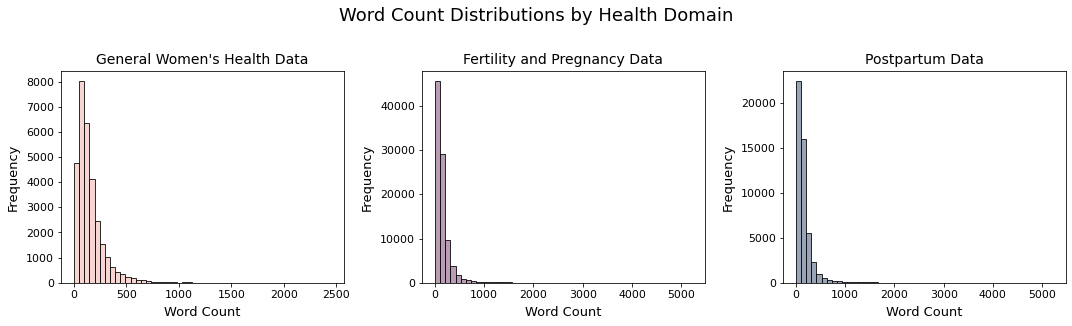

In [213]:
fig, axes = plt.subplots(1, 3, figsize = (15, 4))

ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

subplot_histogram(health['word_count'], 
                  axis = ax1,
                  title = 'General Women\'s Health Data',
                  x_label = 'Word Count',
                  y_label = 'Frequency',
                  color = blush )


subplot_histogram(obsgyn['word_count'], 
                  axis = ax2,
                  title = 'Fertility and Pregnancy Data',
                  x_label = 'Word Count',
                  y_label = 'Frequency',
                  color = dark_purple)

subplot_histogram(pospar['word_count'],
                  axis = ax3,
                  title = 'Postpartum Data',
                  x_label = 'Word Count',
                  y_label = 'Frequency',
                  color = warm_grey)

plt.suptitle('Word Count Distributions by Health Domain', y = 1.12, size = 18);

As shown in the histograms above, the majority of posts for all three health domains are less than 1000 words in length.

**General Women's Health Domain**: The average word count for the Women's Health domain was 154.5, but word counts ranged from 1 to 2453 words. Almost 75% of posts had word counts of 193 words or less. 

**Fertility and Pregnancy Domain**: The average word count for the Fertility and Pregnancy domain was 154.2 words, but word counts varied from 1 to 5238 words. Almost 75% of posts had word counts of 182 words or less.

**Postpartum Domain**: The average word count for the Postpartum domain is 169.8 words, but word counts range from 1 to 5238. Almost 75% of posts have word counts of 195 words or less.

### Visualizing Most Common Words and Bigrams

#### Functions

In [60]:
def get_word_vector(data, ngrams = (1,1), stopwords = None, min_df = 0.001):
    cvec = CountVectorizer(stop_words = stopwords, ngram_range = ngrams, min_df = min_df)
    words = cvec.fit_transform(data)
    df = pd.DataFrame(words.toarray(), columns = cvec.get_feature_names())
    return df

In [61]:
def get_word_sums(words_df):
    word_sum = {}
    for column in words_df.columns:
        word_sum[column] = words_df[column].sum()
    df = pd.DataFrame(sorted(word_sum.items(), key = lambda x: x[1], reverse = True), columns = ['Word', 'Count'])
    return df.sort_values('Count', ascending = False)

In [195]:
def plot_top_words(word_count_df, num_words = 10, title = None, x_label = None, y_label = None, color = None):
    plt.figure(figsize = (15,8))
    sns.barplot(y = word_count_df['Word'][:num_words], x = word_count_df['Count'][:num_words], orient = 'h', color = color, edgecolor = 'black')
    plt.title(title, fontdict = {'fontsize':18}, pad = 12)
    plt.xlabel('Count', fontdict = {'fontsize':15}, labelpad = 10)
    plt.ylabel('Word', fontdict = {'fontsize':15}, labelpad = 10)
    plt.xticks(size = 12)
    plt.yticks(size = 12)
    plt.tight_layout;

#### Define Original Text Corpus

In [63]:
og_health_corpus = health['total_text'].copy()
og_obsgyn_corpus = obsgyn['total_text'].copy()
og_pospar_corpus = pospar['total_text'].copy()

### Most Frequent Words - Stop Words ***NOT*** Removed

In [64]:
# Create Bag of Words

og_health_words = get_word_vector(og_health_corpus)
og_obsgyn_words = get_word_vector(og_obsgyn_corpus)
og_pospar_words = get_word_vector(og_pospar_corpus)

In [65]:
# Count the Number of Times that Each Word Appears

og_health_word_counts = get_word_sums(og_health_words)
og_obsgyn_word_counts = get_word_sums(og_obsgyn_words)
og_pospar_word_counts = get_word_sums(og_pospar_words)

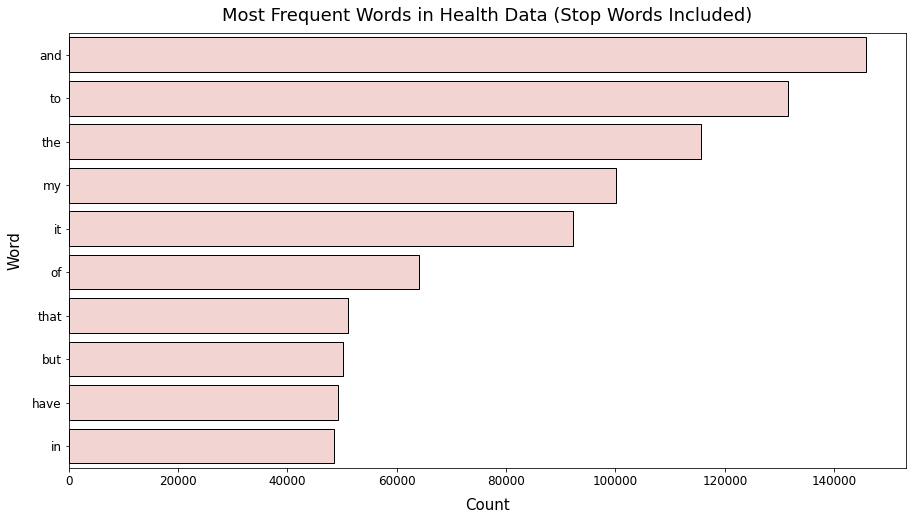

In [196]:
# Plot Top 10 Word Counts
plot_top_words(og_health_word_counts,
               title = 'Most Frequent Words in Health Data (Stop Words Included)',
               color = blush)

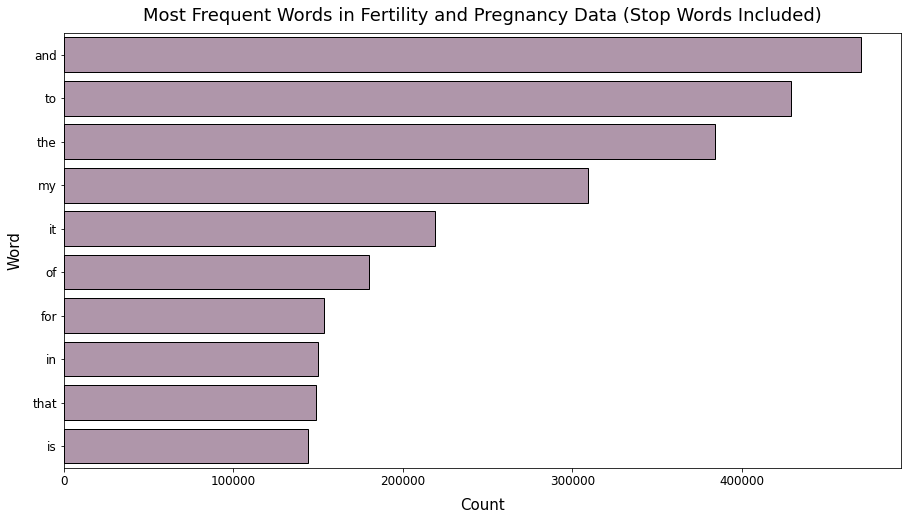

In [215]:
plot_top_words(og_obsgyn_word_counts, 
               title = 'Most Frequent Words in Fertility and Pregnancy Data (Stop Words Included)',
               color = dark_purple)

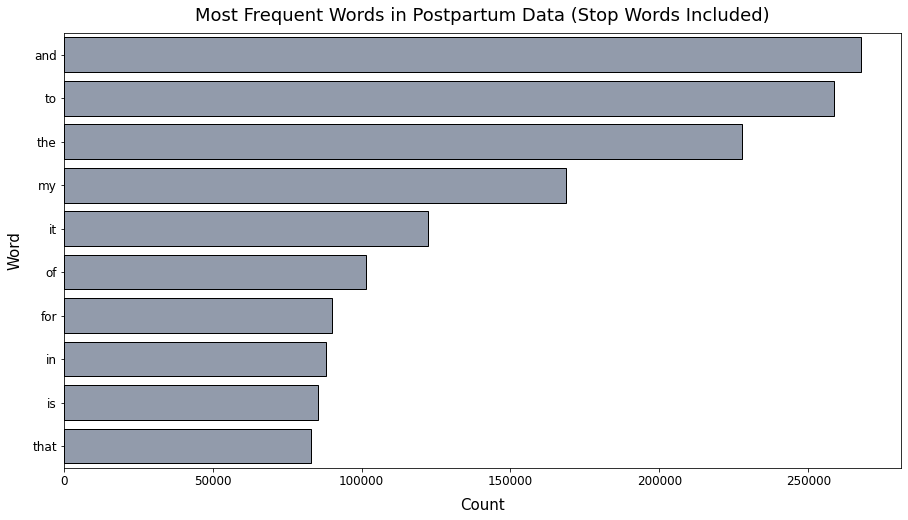

In [214]:
plot_top_words(og_pospar_word_counts, 
               title = 'Most Frequent Words in Postpartum Data (Stop Words Included)',
               color = warm_grey)

### Most Frequent Words by Data Set - Stopwords Removed

In [69]:
swr_health_words = get_word_vector(og_health_corpus, stopwords = full_stop_words)
swr_obsgyn_words = get_word_vector(og_obsgyn_corpus, stopwords = full_stop_words)
swr_pospar_words = get_word_vector(og_pospar_corpus, stopwords = full_stop_words)

In [70]:
swr_health_word_counts = get_word_sums(swr_health_words)
swr_obsgyn_word_counts = get_word_sums(swr_obsgyn_words)
swr_pospar_word_counts = get_word_sums(swr_pospar_words)

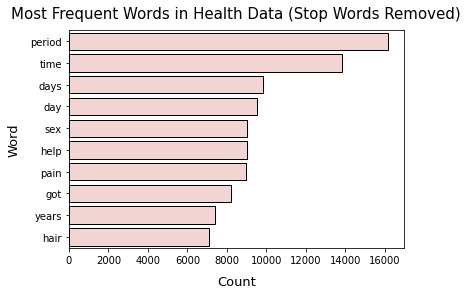

In [71]:
plot_top_words(swr_health_word_counts, 
               title = 'Most Frequent Words in Health Data (Stop Words Removed)',
               color = blush)

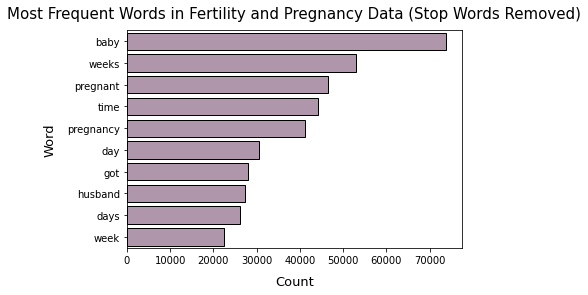

In [72]:
plot_top_words(swr_obsgyn_word_counts, 
               title = 'Most Frequent Words in Fertility and Pregnancy Data (Stop Words Removed)',
               color = dark_purple)

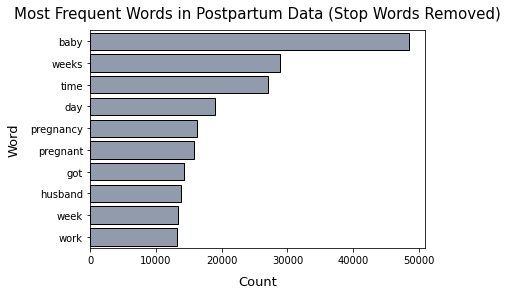

In [73]:
plot_top_words(swr_pospar_word_counts, 
               title = 'Most Frequent Words in Postpartum Data (Stop Words Removed)',
               color = warm_grey)

### Most Frequent Bigrams by Data Set - Stopwords Removed

In [74]:
swr_health_bigrams = get_word_vector(og_health_corpus, ngrams = (2,2), stopwords = full_stop_words)
swr_obsgyn_bigrams = get_word_vector(og_obsgyn_corpus, ngrams = (2,2), stopwords = full_stop_words)
swr_pospar_bigrams = get_word_vector(og_pospar_corpus, ngrams = (2,2), stopwords = full_stop_words)

In [75]:
swr_health_bigrams_counts = get_word_sums(swr_health_bigrams)
swr_obsgyn_bigrams_counts = get_word_sums(swr_obsgyn_bigrams)
swr_pospar_bigrams_counts = get_word_sums(swr_pospar_bigrams)

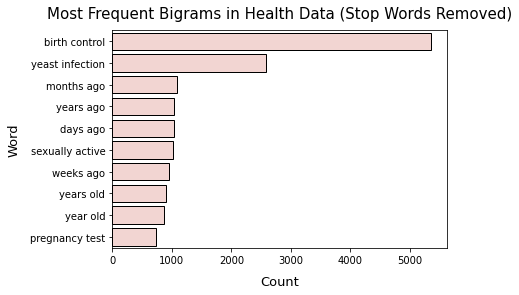

In [76]:
plot_top_words(swr_health_bigrams_counts, 
               title = 'Most Frequent Bigrams in Health Data (Stop Words Removed)',
               color = blush)

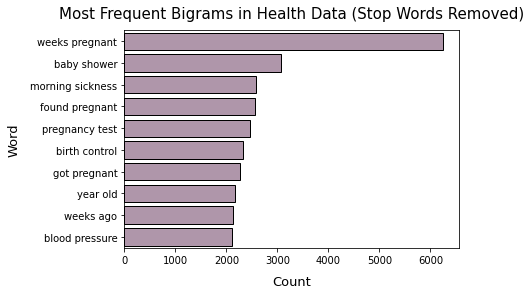

In [77]:
plot_top_words(swr_obsgyn_bigrams_counts, 
               title = 'Most Frequent Bigrams in Health Data (Stop Words Removed)',
               color = dark_purple)

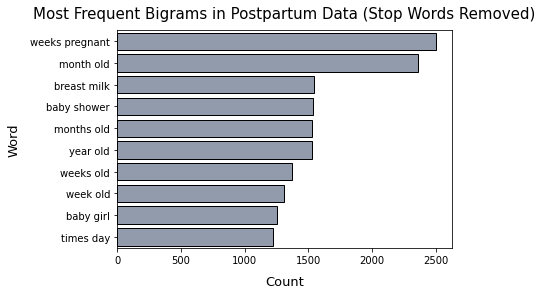

In [78]:
plot_top_words(swr_pospar_bigrams_counts, 
               title = 'Most Frequent Bigrams in Postpartum Data (Stop Words Removed)',
               color = warm_grey)

### Most Frequent Trigrams - Stop Words Removed

In [79]:
swr_health_trigrams = get_word_vector(og_health_corpus, ngrams = (3,3), stopwords = full_stop_words, min_df = 0.005)
swr_obsgyn_trigrams = get_word_vector(og_obsgyn_corpus, ngrams = (3,3), stopwords = full_stop_words, min_df = 0.003)
swr_pospar_trigrams = get_word_vector(og_pospar_corpus, ngrams = (3,3), stopwords = full_stop_words, min_df = 0.003)

In [80]:
swr_health_trigrams_counts = get_word_sums(swr_health_trigrams)
swr_obsgyn_trigrams_counts = get_word_sums(swr_obsgyn_trigrams)
swr_pospar_trigrams_counts = get_word_sums(swr_pospar_trigrams)

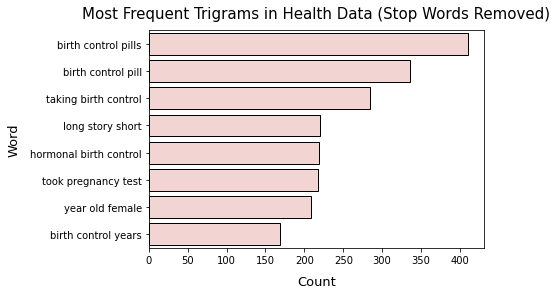

In [81]:
plot_top_words(swr_health_trigrams_counts, 
               title = 'Most Frequent Trigrams in Health Data (Stop Words Removed)',
               color = blush)

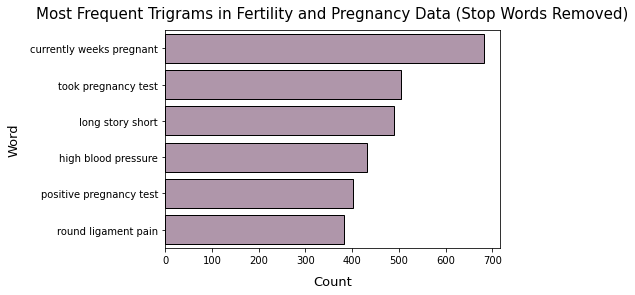

In [82]:
plot_top_words(swr_obsgyn_trigrams_counts, 
               title = 'Most Frequent Trigrams in Fertility and Pregnancy Data (Stop Words Removed)',
               color = dark_purple)

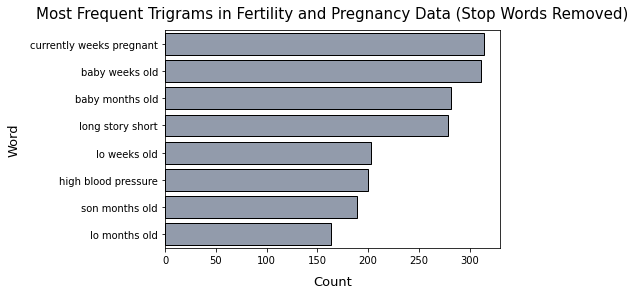

In [83]:
plot_top_words(swr_pospar_trigrams_counts, 
               title = 'Most Frequent Trigrams in Fertility and Pregnancy Data (Stop Words Removed)',
               color = warm_grey)

### Visualizing Most Frequent Lemmatized Words, Bigrams, and Trigrams

In [84]:
lemmas_health_corpus = health['lemma_text']
lemmas_obsgyn_corpus = obsgyn['lemma_text']
lemmas_pospar_corpus = pospar['lemma_text']

In [85]:
lemmas_health_words = get_word_vector(lemmas_health_corpus, stopwords = full_stop_words)
lemmas_obsgyn_words = get_word_vector(lemmas_obsgyn_corpus, stopwords = full_stop_words)
lemmas_pospar_words = get_word_vector(lemmas_pospar_corpus, stopwords = full_stop_words)

lemmas_health_word_counts = get_word_sums(lemmas_health_words)
lemmas_obsgyn_word_counts = get_word_sums(lemmas_obsgyn_words)
lemmas_pospar_word_counts = get_word_sums(lemmas_pospar_words)

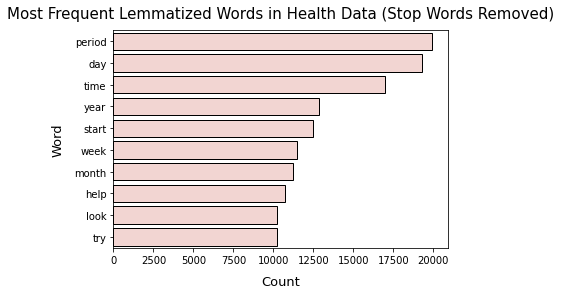

In [86]:
plot_top_words(lemmas_health_word_counts, 
               title = 'Most Frequent Lemmatized Words in Health Data (Stop Words Removed)',
               color = blush)

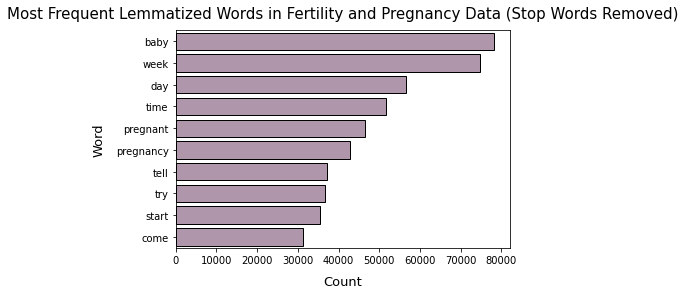

In [87]:
plot_top_words(lemmas_obsgyn_word_counts, 
               title = 'Most Frequent Lemmatized Words in Fertility and Pregnancy Data (Stop Words Removed)',
               color = dark_purple)

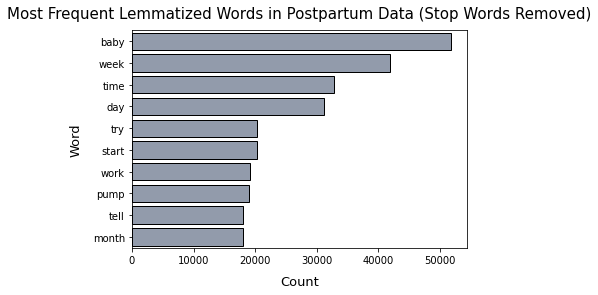

In [88]:
plot_top_words(lemmas_pospar_word_counts, 
               title = 'Most Frequent Lemmatized Words in Postpartum Data (Stop Words Removed)',
               color = warm_grey)

In [89]:
lemmas_health_bigrams = get_word_vector(lemmas_health_corpus, ngrams = (2,2), stopwords = full_stop_words)
lemmas_obsgyn_bigrams = get_word_vector(lemmas_obsgyn_corpus, ngrams = (2,2), stopwords = full_stop_words)
lemmas_pospar_bigrams = get_word_vector(lemmas_pospar_corpus, ngrams = (2,2), stopwords = full_stop_words)

lemmas_health_bigrams_counts = get_word_sums(lemmas_health_bigrams)
lemmas_obsgyn_bigrams_counts = get_word_sums(lemmas_obsgyn_bigrams)
lemmas_pospar_bigrams_counts = get_word_sums(lemmas_pospar_bigrams)

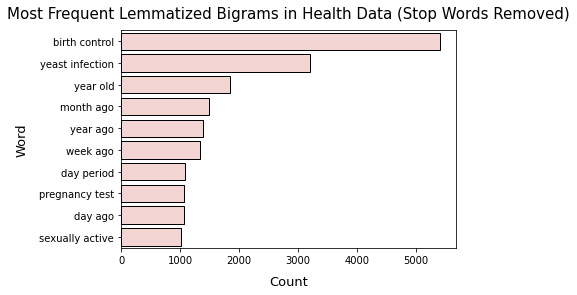

In [90]:
plot_top_words(lemmas_health_bigrams_counts, 
               title = 'Most Frequent Lemmatized Bigrams in Health Data (Stop Words Removed)',
               color = blush)

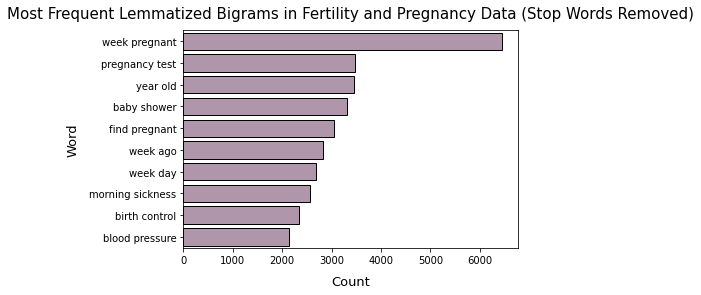

In [91]:
plot_top_words(lemmas_obsgyn_bigrams_counts, 
               title = 'Most Frequent Lemmatized Bigrams in Fertility and Pregnancy Data (Stop Words Removed)',
               color = dark_purple)

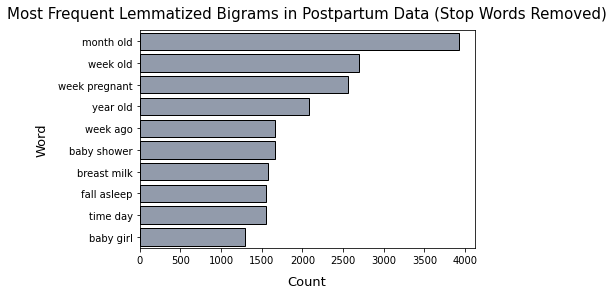

In [92]:
plot_top_words(lemmas_pospar_bigrams_counts, 
               title = 'Most Frequent Lemmatized Bigrams in Postpartum Data (Stop Words Removed)',
               color = warm_grey)

In [93]:
lemmas_health_trigrams = get_word_vector(lemmas_health_corpus, ngrams = (3,3), stopwords = full_stop_words)
lemmas_obsgyn_trigrams = get_word_vector(lemmas_obsgyn_corpus, ngrams = (3,3), stopwords = full_stop_words, min_df = 0.003)
lemmas_pospar_trigrams = get_word_vector(lemmas_pospar_corpus, ngrams = (3,3), stopwords = full_stop_words, min_df = 0.003)

lemmas_health_trigrams_counts = get_word_sums(lemmas_health_trigrams)
lemmas_obsgyn_trigrams_counts = get_word_sums(lemmas_obsgyn_trigrams)
lemmas_pospar_trigrams_counts = get_word_sums(lemmas_pospar_trigrams)

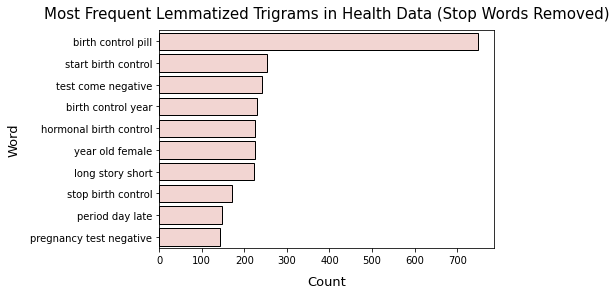

In [94]:
plot_top_words(lemmas_health_trigrams_counts, 
               title = 'Most Frequent Lemmatized Trigrams in Health Data (Stop Words Removed)',
               color = blush)

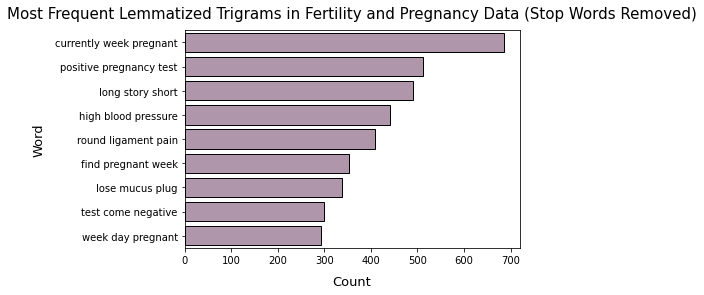

In [95]:
plot_top_words(lemmas_obsgyn_trigrams_counts, 
               title = 'Most Frequent Lemmatized Trigrams in Fertility and Pregnancy Data (Stop Words Removed)',
               color = dark_purple)

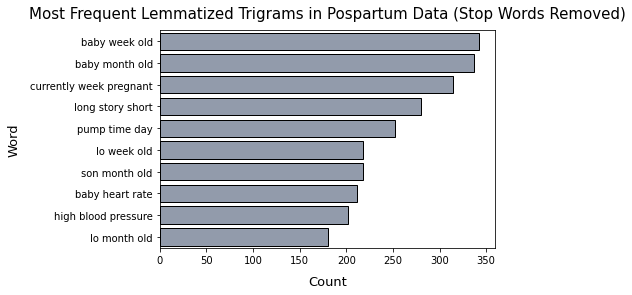

In [96]:
plot_top_words(lemmas_pospar_trigrams_counts, 
               title = 'Most Frequent Lemmatized Trigrams in Pospartum Data (Stop Words Removed)',
               color = warm_grey)

### Sentiment Analysis

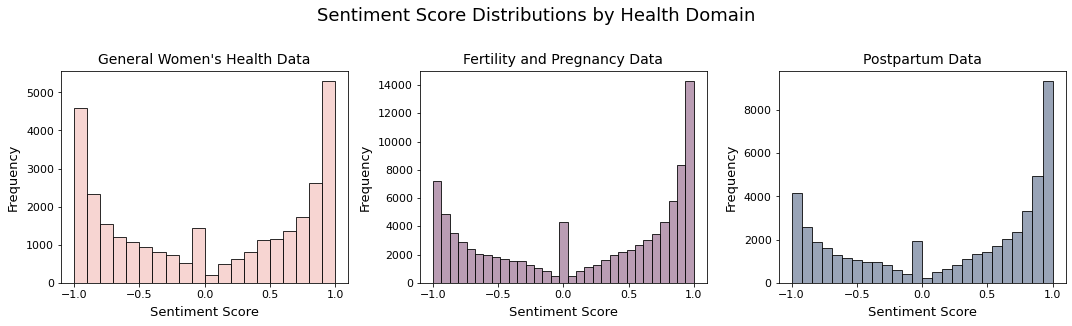

In [97]:
fig, axes = plt.subplots(1, 3, figsize = (15, 4))

ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

subplot_histogram(health['sentiment_score'], 
                  axis = ax1,
                  title = 'General Women\'s Health Data',
                  x_label = 'Sentiment Score',
                  y_label = 'Frequency',
                  color = blush )


subplot_histogram(obsgyn['sentiment_score'], 
                  axis = ax2,
                  title = 'Fertility and Pregnancy Data',
                  x_label = 'Sentiment Score',
                  y_label = 'Frequency',
                  color = dark_purple)

subplot_histogram(pospar['sentiment_score'],
                  axis = ax3,
                  title = 'Postpartum Data',
                  x_label = 'Sentiment Score',
                  y_label = 'Frequency',
                  color = warm_grey)

plt.suptitle('Sentiment Score Distributions by Health Domain', y = 1.12, size = 18);

## Model Preparation

In [125]:
health = pd.read_csv('../data/womens_health_preprocessed.csv', lineterminator='\n')
print(f'Health: {health.shape}')
obsgyn = pd.read_csv('../data/fertility_and_pregnancy_preprocessed.csv')
print(f'ObsGyn: {obsgyn.shape}')
pospar = pd.read_csv('../data/postpartum_preprocessed.csv')
print(f'Pospar: {pospar.shape}')

Health: (30616, 7)
ObsGyn: (92943, 7)
Pospar: (49094, 7)


In [126]:
# Update Stop Words
words_to_add = ['like', 'know', 'want', 'feel', 'going', 'think', 'reddit', 'imgur', 'pron', 'officially', 'story', 'month', 'week', 'time', 'day', 'year', 'delete', 'saturday', 'sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'subreddit']

add_stop_words(words_to_add, full_stop_words)
remove_stop_words(['not'], full_stop_words)

### Create Document Term Matrix From Corpus

#### Function

In [127]:
def build_tvec(df, column, stop_words = full_stop_words):
    tvec = TfidfVectorizer(max_df = 0.98, min_df = 0.005, ngram_range = (1,2), stop_words = stop_words)
    dtm = tvec.fit_transform(df[column])
    return tvec, dtm

#### Create Document Term Matrix

In [128]:
# Vectorizer, dtm are outputed from build_tvec

health_vectorizer, health_dtm = build_tvec(health, 'lemma_text')
obsgyn_vectorizer, obsgyn_dtm = build_tvec(obsgyn, 'lemma_text')
pospar_vectorizer, pospar_dtm = build_tvec(pospar, 'lemma_text')

#### Transform Document Term Matrix into a Term Document Matrix that can be recognized by Gensim

**Note**: Code for these steps was modified from [A Dash of Data](https://github.com/adashofdata/nlp-in-python-tutorial) by Alice Zhao

In [129]:
def create_tdm(dtm):
    tdm = dtm.transpose()
    return tdm

In [130]:
def tdm_to_gensim_corpus(tdm):
    sparse = scipy.sparse.csr_matrix(tdm) # Create a compressed sparse row matrix
    corpus = matutils.Sparse2Corpus(tdm) # Create a corpus from sparse matrix
    return corpus

In [131]:
def prepare_dtm_for_gensim(dtm):
    tdm = create_tdm(dtm)
    corpus = tdm_to_gensim_corpus(tdm)
    return corpus

In [132]:
health_corpus = prepare_dtm_for_gensim(health_dtm)
obsgyn_corpus = prepare_dtm_for_gensim(obsgyn_dtm)
pospar_corpus = prepare_dtm_for_gensim(pospar_dtm)

## Define Vocabulary Dictionary from Vectorizer

In [133]:
def create_vocab_dictionary(vectorizer):
    vocab_dictionary = dict((v,k) for k,v in vectorizer.vocabulary_.items())
    return vocab_dictionary

In [134]:
health_vocabulary = create_vocab_dictionary(health_vectorizer)
obsgyn_vocabulary = create_vocab_dictionary(obsgyn_vectorizer)
pospar_vocabulary = create_vocab_dictionary(pospar_vectorizer)

In [135]:
# https://stackoverflow.com/questions/21552518/using-scikit-learn-vectorizers-and-vocabularies-with-gensim

health_gensim_dict = Dictionary.from_corpus(corpus = health_corpus, id2word = health_vocabulary)
obsgyn_gensim_dict = Dictionary.from_corpus(corpus = obsgyn_corpus, id2word = obsgyn_vocabulary)
pospar_gensim_dict = Dictionary.from_corpus(corpus = pospar_corpus, id2word = pospar_vocabulary)

## Topic Modeling with Latent Dirichlet Allocation (LDA)

### Functions

In [136]:
def build_gensim_lda(corpus, n_topics, vocabulary, n_passes):
    lda = LdaModel(corpus = corpus, num_topics = n_topics, id2word = vocabulary, passes = n_passes, decay = 0.7, offset = 10, random_state = 2020)
    return lda

In [137]:
def build_gensim_coherence_model(model, corpus, dictionary):
    coherence = CoherenceModel(model = model, corpus = corpus, dictionary = dictionary, coherence = 'u_mass')
    return round(coherence.get_coherence(), 3)

In [138]:
def get_topic_terms(model, n_topics, n_words):
    return model.print_topics(num_topics = n_topics, num_words = n_words)

In [139]:
# Function Written By Selva Prabhakaran
# https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

def assign_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]): # iterate over transformed corpus to get topic probabilities for document
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break

    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    
    sent_topics_df.columns = ['Dominant_Topic', 'Percent_Dominant_Topic', 'Keywords', 'Original_Text']
    
    return sent_topics_df

In [140]:
def display_pyLDAvis(model, corpus, gensim_dict):
    prepared = pyLDAvis.gensim.prepare(model, corpus, gensim_dict)
    display = pyLDAvis.display(prepared)
    return display

### General Women's Health Data

#### Build Model

In [141]:
%%time
health_lda_model = build_gensim_lda(health_corpus, 
                               n_topics = 12, 
                               vocabulary = health_vocabulary, 
                               n_passes = 50)

CPU times: user 5min 20s, sys: 385 ms, total: 5min 20s
Wall time: 5min 20s


#### Evaluate Model on UMass Coherence

In [142]:
build_gensim_coherence_model(health_lda_model, corpus = health_corpus, dictionary = health_vocabulary)

-2.334

#### Evaluate Topic Separation and Check Relevant Terms using pyLDAvis

In [143]:
display_pyLDAvis(health_lda_model, health_corpus, health_gensim_dict)

### Fertility and Pregnancy Data

In [144]:
%%time
obsgyn_lda_model = build_gensim_lda(obsgyn_corpus, 
                               n_topics = 10, 
                               vocabulary = obsgyn_vocabulary, 
                               n_passes = 50)

CPU times: user 21min 20s, sys: 7.49 s, total: 21min 28s
Wall time: 21min 35s


In [145]:
build_gensim_coherence_model(obsgyn_lda_model, corpus = obsgyn_corpus, dictionary = obsgyn_vocabulary)

-1.961

In [146]:
display_pyLDAvis(obsgyn_lda_model, obsgyn_corpus, obsgyn_gensim_dict)

### Postpartum and Early Parenthood Data

In [147]:
%%time
pospar_lda_model = build_gensim_lda(pospar_corpus, 
                               n_topics = 12, 
                               vocabulary = pospar_vocabulary, 
                               n_passes = 50)

CPU times: user 11min 13s, sys: 4.79 s, total: 11min 18s
Wall time: 11min 23s


In [148]:
build_gensim_coherence_model(pospar_lda_model, corpus = pospar_corpus, dictionary = pospar_vocabulary)

-1.992

In [149]:
display_pyLDAvis(pospar_lda_model, pospar_corpus, pospar_gensim_dict)

## Topic Interpretation and Evaluation

### Functions

In [150]:
def get_topic_terms(model, n_topics, n_words):
    return model.print_topics(num_topics = n_topics, num_words = n_words)

In [151]:
# Function Written By Selva Prabhakaran
# https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

def assign_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]): # iterate over transformed corpus to get topic probabilities for document
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break

    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    
    sent_topics_df.columns = ['Dominant_Topic', 'Percent_Dominant_Topic', 'Keywords', 'Original_Text']
    
    return sent_topics_df

In [205]:
def plot_topics_in_corpus(df, column, color, title = None, x_label = None):
    plt.figure(figsize = (15, 8))
    round(df[column].value_counts(normalize = True) * 100, 2).sort_values(ascending = True).plot.barh(color = color, ec = 'k', width = 0.75);
    plt.title(title, fontdict = {'fontsize': 20}, pad = 18)
    plt.xlabel(x_label, fontdict = {'fontsize': 15}, labelpad = 10)
    plt.xticks(size = 12)
    plt.yticks(size = 12)
    plt.tight_layout();

In [153]:
def filter_df_by_topic(df, column, topic):
    filtered_df = df[df[column] == topic]
    filtered_df = filtered_df.sort_values(by = "Percent_Dominant_Topic", ascending = False)
    return filtered_df

In [154]:
def get_top_posts(df):
    topic_df_dict = {}
    top_posts_dict = {}
    percent_dominant = {}
    for topic in df['Dominant_Topic'].unique():
        topic_df_dict[topic] = filter_df_by_topic(df, 'Dominant_Topic', topic)
        topic_df = topic_df_dict[topic]
        top_post = topic_df[topic_df['Percent_Dominant_Topic'] == topic_df['Percent_Dominant_Topic'].max()]['Original_Text'].values
        top_posts_dict[topic] = profanity.censor(top_post[0])
        percent_dominant[topic] = topic_df['Percent_Dominant_Topic'].max()
    
    return top_posts_dict, percent_dominant

### General Women's Health Data

In [155]:
get_topic_terms(health_lda_model, 1, 5) # Will show the words with the highest probability for topic chosen at random

[(1,
  '0.119*"tampon" + 0.095*"cup" + 0.067*"pad" + 0.057*"menstrual" + 0.045*"menstrual cup"')]

In [156]:
health_lda_topic_terms = get_topic_terms(health_lda_model, 12, 20)

In the table below, the twelve topics that were indentified in the General Women's Health data set are presented. As seen below, there were three topic clusters that were not related to women's health.

<h4 align = center> Topics Related to Women's Health Concerns </h4>

| Topic Number| Name| Top 5 Terms |
|:-:|:-:|:-:|
|0|Infections (Yeast Infection and Bacterial Vaginosis)|infection, yeast, yeast infection, discharge, smell|
|1|Feminine Hygiene Products| tampon, cup, pad, menstrual, menstrual cup|
|4| Pains| pain, period, cyst, cramp, doctor|
|5| Body Image and Self-Esteem| eat, food, self esteem, esteem, diet|
|6| Birth Control (Intrauterine Devices and Implants)| IUD (intrauterine device), control, birth, birth control, pill|
|7| General Gynecological Health| vagina, breast, sex, pap, hurt|
|8| Infections (Urinary Tract Infections)| UTI (urinary tract infection), pee, drink, antibiotic, orgasm|
|9| Birth Control (Oral Contraceptives and Condoms)| pill, birth control, birth, control, pack|
|10| Menstrual Cycle and Abnormalities| period, bleed, start, test, pregnancy|

<h4 align = center> Topics Not Related to Health Concerns </h4>

| Topic Number| Name| Top 5 Terms |
:-:|:-:|:-:
2| Social Relationships| friend, guy, people, work, thing
3| Hair and Depilation| hair, shave, skin, look, wax
11| Fashion| wear, dress, bra, look, buy


From this data set, the following women's health concerns emerged:

* **Infections (Yeast Infections and Bacterial Vaginosis)**: The top five terms for this topic were "infection", "yeast", "yeast infection", "discharge", and "smell". However, other words that were seen in this topic cluster include mentions of "BV" (bacterial vaginosis), words related to anatomical location ("vagina", "vaginal"), and other vaginal symptoms ("itch", "itching", "symptom").

* **Infections (Urinary Tract Infections)**: The top five terms for this topic were "UTI" (urinary tract infection), "pee", "drink", "antibiotic", and "orgasm". Other words related to urinary tract infections included descriptions of symptoms: "burn", "urine", "bladder", "sensation". The words "sex" and "orgasm" were also included in this cluster. Given that sexual intercourse can be a source of bacteria that might lead to a urinary tract infection, it is possible that these terms were included in posts as a possible cause of the infection.

* **Menstrual Cycle and Abnormalities**: The top five terms for this topic were "period", "bleed", "start", "test" and "pregnancy". Words such as "period", "bleed", "start", "normal", "cycle", and "blood" suggest that the topic is about the menstrual cycle. Words such as "test", "pregnancy", "pregnant", "late", "spot", "pill", and "light" suggest that this topic might describe menstrual cycle abnormalities, such as a late or missed period, possibility of pregnancy, spotting, or a lighter than usual period.

* **Feminine Hygiene Products**: The top five words for this topic were "tampon", "cup", "pad", "menstrual", and "menstrual cup". All of these words are commonly used feminine hygiene products used during a woman's period. Additionally, words that suggest advice on how or when to use these products emerged, including "use", "try", "insert", and "wear". Events which might require a feminine hygiene product also emerged, including "abortion" and "period".

* **General Gynecological Health**: The top five words for this topic were "vagina", "breast", "sex", "pap" (pap smear), and "hurt". This cluster contained words related to the routine gynecological exam, including "pap", "smear", "pap smear", and "doctor". This topic also seemed to capture concerns about possible tumors ("lump", "bump") and general pains ("hurt", "pain", "painful"). All of the concerns in this topic are things that would be discussed at an annual gynecological exam.

* **Pains**: The top five words for this topic were "pain", "period", "cyst", "cramp", "doctor". This topic seemed to capture common pains that women experience, including period pain ("period", "cramp", "pelvic"), as well as pains related to ovarian cysts ("ovary", "ovarian", "cyst", "pelvic", "right"). The term "ultrasound" suggests that this topic might also include procedures used to detect ovarian cysts.

* **Birth Control (Intrauterine Devices and Implants)**: The top five words for this topic were "IUD" (intrauterine device), "control", "birth", "birth control", an "pill". Although the posts in this topic were likely related to birth control, several words suggest that the questions were about alternatives to oral contraceptives. The words "implant" and "Nexplanon" (a type of implant) suggest birth control implants, while the words "IUD", "Mirena" (a brand of IUD), "copper", and "hormonal" could be discussing hormonal and non-hormonal versions of IUDs. It appears that this topic might also include posts about experiences with these birth control methods, including possible effects on "acne" and "mood".

* **Birth Control (Oral Contraceptives and Condoms)**: The top five words for this topic were "pill", "birth control", "birth", "control", and "pack". Several of these words, including the top five, suggest that this topic includes posts about oral contraceptives. Other words that suggest oral contraceptives are "control pill", "plan" (maybe Plan B), "placebo", "bc" (birth control), and "miss" (possibly a missed pill). "Condom" is also the 6th most common word, which suggests that condoms as a form of birth control might also be included in this topic.

* **Body Image and Self-Esteem**: The top five words for this category were "eat", "food", "self esteem", "esteem", and "diet". Several words suggest that this topic might include posts about body image and self-esteem, including "eat", "food", "self esteem", "esteem", "diet", "vitamin", "belly", "insecure", "supplement", and "cope". 

There were three topics not related to women's health:
* **Social Relationships**: The top five terms for this topic are "friend", "guy", "people", "work", "thing", and "talk". The terms in this category seemed to describe both platonic and romantic relationships. Example terms include: "friend", "date", "relationship", "guy", "girl", and "love". The words "work", "job", and "school" suggest that professional relationships might also be discussed in this topic.
* **Hair and Depilation**: The top five terms for this topic are "hair", "shave", "skin", "look", and "wax". This category seems to encompass hair styles ("hair", "face", "grow", "dry", "long", "cut", "dye", "shampoo", "color"), hair removal ("shave", "wax"), and other topics related to beauty ("skin", "look", "makeup", "lip").
* **Fashion**: The top terms for this topic are "wear", "dress", "bra", "look", and "buy". Several words in this topic seem to be related to apparel and fashion, including: "dress", "buy", "clothe", "size", "weight", "jean", "fit", "style", "shoe", "short", "shirt", "pant", and "underwear".

In [157]:
health_topic_df = assign_topics_sentences(health_lda_model, health_corpus, health['total_text'])

In [158]:
health_topic_df['Dominant_Topic'] = health_topic_df['Dominant_Topic'].map({0.0: 'Infections (Yeast Infection and Bacterial Vaginosis)',
                                                    1.0: 'Feminine Hygiene Products',
                                                    2.0: 'Social Relationships',
                                                    3.0: 'Hair and Depilation',
                                                    4.0: 'Pains',
                                                    5.0: 'Body Image and Self-Esteem',
                                                    6.0: 'Birth Control (Intrauterine Devices and Implants',
                                                    7.0: 'General Gynecological Health',
                                                    8.0: 'Infections (Urinary Tract Infections)',
                                                    9.0: 'Birth Control (Oral Contraceptives and Condoms)',
                                                    10.0: 'Menstrual Cycle and Abnormalities',
                                                    11.0: 'Fashion'})

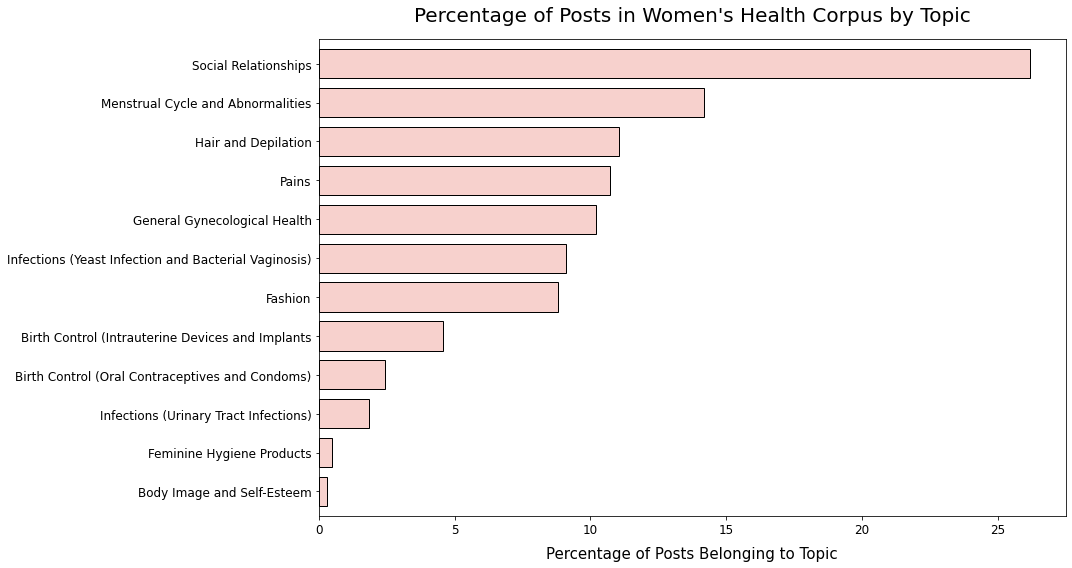

In [206]:
plot_topics_in_corpus(health_topic_df, 
                      'Dominant_Topic', 
                       blush,
                       title = 'Percentage of Posts in Women\'s Health Corpus by Topic',
                       x_label = 'Percentage of Posts Belonging to Topic')

In [162]:
health_posts_dict, health_dominance_dict = get_top_posts(health_topic_df)
top_health_posts_df = pd.DataFrame.from_dict({'Most Representative Post': health_posts_dict, 'Percent_Dominant': health_dominance_dict})
top_health_posts_df

,Most Representative Post,Percent_Dominant
Infections (Yeast Infection and Bacterial Vaginosis),"Yeast Infection, BV, and ANOTHER Yeast infecti...",0.9155
Menstrual Cycle and Abnormalities,Am I overreacting to bleeding between periods?...,0.9183
Birth Control (Intrauterine Devices and Implants,I suspect birth control pills may be causing d...,0.8826
Pains,"My GYNO/Doctor Is Ignoring My Pain, and It's B...",0.9273
General Gynecological Health,Terrified of penetration but I need a pelvic e...,0.9044
Fashion,Seeking Plus-Size Friendly Online Stores with ...,0.8990
Social Relationships,Opening up about my traumatic past with bullyi...,0.9339
Birth Control (Oral Contraceptives and Condoms),what were your experiences and side effects fr...,0.8552
Infections (Urinary Tract Infections),"UTI help Hi girls, so I’m pretty sure I have m...",0.8470
Hair and Depilation,A rave review for at-home IPL hair removal! I ...,0.9073


### Fertility and Pregnancy Data

In [163]:
obsgyn_lda_topic_terms = get_topic_terms(obsgyn_lda_model, 10, 30)

<h4 align = center> Clusters Related to Fertility and Pregnancy Concerns </h4>

| Cluster Number| Name| Top 5 Terms |
|:-:|:-:|:-:|
|0| Pregnancy Life Changes| birth, work, baby, hospital, leave
|1| Pregnancy Announcement| baby, pregnant, tell, husband, family
|2| Labor and Delivery| contraction, labor, cm (centimeters), induction, induce
|3| Nausea and Vomiting During Pregancy| eat, sleep, food, nausea, morning
|4| Determination of Pregnancy| test, period, pregnancy, pregnant, positive
|6| Fertility| cycle, ovulation, TTC (trying to conceive), try, ovulate
|8| Obstetrics Appointments| ultrasound, doctor, blood, baby, appointment
|9| Pregnancy Pains and Body Changes| pain, belly, baby, weight, kick

<h4 align = center> Clusters Not Related to Health Concerns </h4>

| Cluster Number| Name| Top 5 Terms |
|:-:|:-:|:-:|
|5| Recommendations for Products|maternity, pregnancy, pregnant, recommendation, bra
|7| Items for the New Baby| baby, buy, shower, nursey, diaper

From this data set, the following women's health concerns emerged:

* **Pregnancy Life Changes**: The top five terms for this topic are "birth", "work", "baby", "hospital", and "leave". Overall, this topic seems to be clustered around preparing for the experience of pregnancy and labor and the associated life changes that come with this major life change. Terms related to pregnancy and delivery are: "birth", "baby", "hospital", "csection" (C-Section), "pregnant", "pregnancy", "delivery", "doctor", and "labor". Terms indicative of life changes include: "work", "leave", "job", "plan", and "insurance".

* **Pregnancy Announcement**: The top five terms in this topic are: "baby", "pregnant", "tell", "husband", and "family". These terms, along with "people", "friend", "mom", "work", and "excited", suggest that posts in this topic might be about announcing the pregnancy to family members, friends, and the place of employment. 

* **Labor and Delivery**: The top five terms for this topic are "contraction", "labor", "cm" (centimeters), "induction", and "induce", suggesting that this topic is related to labor and delivery of the baby. Other terms in this topic that are related to the process of labor and delivery include: "epidural", "water", "pain", "dilate", "push", "cervix", "hospital", "labour", "braxton" (Braxton Hicks contractions), "water break", "hicks", and "braxton hicks". 

* **Nausea and Vomiting During Pregnancy and Sleep Difficulties**: The top five terms in this topic are: "eat", "sleep", "food", "nausea", and "morning". Many of the top terms in this topic are related to nausea and vomiting during pregnancy (NVP), as well as possible sleeping difficulties during pregnancy. Terms related to NVP include: "eat", "food", "nausea", "morning", "sickness", "morning sickness", "sick", "drink", "throw", "smell", "nauseous", an "hungry". Terms related to possible sleep difficulties include: "sleep", "night", "wake", "tired", and "bed".

* **Determination of Pregnancy**: The top five terms in this topic are "test", "period", "pregnancy", "pregnant", and "positive". Many of the top terms in this topic are related to pregnancy tests and determining if a woman is pregnant. Terms about pregnancy tests include: "test", "positive", "pregnancy test", "negative", and "line" (possible line on pregnancy test). Terms about determining pregnancy status are related to abnormal period symptoms ("period", "bleed", "spot", "late", "blood", "light", "cramping", "brown", "discharge", and "bleeding"), as a late period, cramping, spotting, and discharge can all occur in early pregnancy. The words "miscarriage", "cramping", and "bleeding" could also indicate that this topic also captures posts about miscarriage. 

* **Fertility**: The top five terms in this topic are "cycle", "ovulation", "TTC" (trying to conceive), "try", and "ovulate". Overall, the top terms in this topic appear to be related to fertility and ovulation. Top terms can be grouped based on *hormones* ["progesterone", "clomid" (an estrogen modulator), and "LH" (lutenizing hormone)], *ovulation tracking* ["cycle", "ovulation", "ovulate", "OPK" (ovulation predictor kit), and "temp" (refers to tracking of basal body temperature)], *fertility and treatments* ["fertility", "conceive", "IUI" (intrauterine insemination), "sperm", "fertile", and *birth control methods* ["pill", "birth control", and "IUD" (intrauterine device)]

* **Obstetrics Appointments**: The top five terms in this topic are "ultrasound", "doctor", "blood", "baby", and "appointment". Many of the terms in this topic appear to be related to procedures ("ultrasound", "blood", "test", "scan", "measure") or medical items ("result", "heartbeat", "heart", "risk", "blood pressure", "level", "anatomy", "placenta") that would be checked at an appointment with the obstetrician. This topic are included the terms doctor and "OB" (obstetrician). 

* **Pregnancy Pains and Body Changes**: The top five terms in this topic are "pain", "belly", "baby", "weight", and "kick". The top terms in this topic that are related to pregnancy pains include: "pain", "kick", "movement", "hurt". There are also possible mentions of where pain might be felt ("belly", "stomach", "leg", "hip", and "foot". The mention of "belly", "bump", "stretch", "stomach", "body", and "big" could also indicate dicussion of body changes, like the baby bump and stretch marks. 


The topics **Recommendations for Products** and **Items for the New Baby** were not directly related to health concerns.  

* **Recommendations for Products**:

* **Items for the New Baby**: 

In [164]:
obsgyn_topic_df = assign_topics_sentences(obsgyn_lda_model, obsgyn_corpus, obsgyn['total_text'])

In [165]:
obsgyn_topic_df['Dominant_Topic'] = obsgyn_topic_df['Dominant_Topic'].map({0.0: 'Pregnancy Life Changes',
                                                    1.0: 'Pregnancy Announcement',
                                                    2.0: 'Labor and Delivery',
                                                    3.0: 'Nausea and Vomiting During Pregnancy and Sleep Concerns',
                                                    4.0: 'Determination of Pregnancy',
                                                    5.0: 'Recommendations for Products',
                                                    6.0: 'Fertility',
                                                    7.0: 'Items for the New Baby',
                                                    8.0: 'Obstetrics Appointments',
                                                    9.0: 'Pregnancy Pains and Body Changes'})

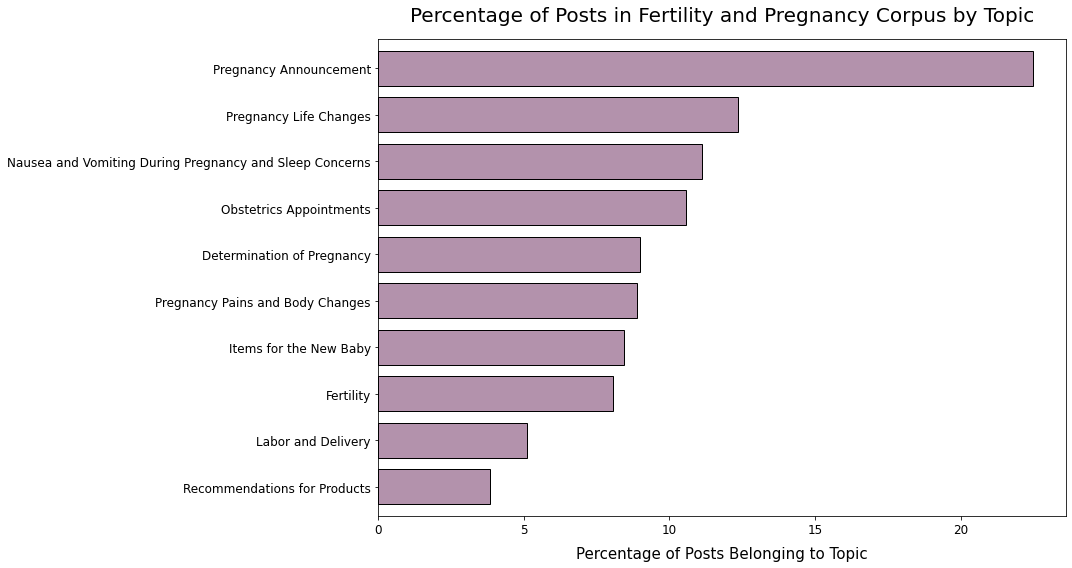

In [207]:
plot_topics_in_corpus(obsgyn_topic_df, 
                      'Dominant_Topic', 
                       medium_purple,
                       title = 'Percentage of Posts in Fertility and Pregnancy Corpus by Topic',
                       x_label = 'Percentage of Posts Belonging to Topic')

In [168]:
obsgyn_posts_dict, obsgyn_dominance_dict = get_top_posts(obsgyn_topic_df)
top_obsgyn_posts_df = pd.DataFrame.from_dict({'Most Representative Post': obsgyn_posts_dict, 'Percent_Dominant': obsgyn_dominance_dict})

top_obsgyn_posts_df

,Most Representative Post,Percent_Dominant
Recommendations for Products,**** Mamas - Favorite Maternity/Nursing Bras? ...,0.8380
Fertility,Should we go for IUI? Curious to hear from oth...,0.8960
Pregnancy Announcement,Struggling at weeks I'm a year old who was d...,0.9397
Determination of Pregnancy,Officially missed period and feeing nauseous f...,0.9147
Pregnancy Life Changes,Birth story: Baby River born / (wd) via emerge...,0.9444
Nausea and Vomiting During Pregnancy and Sleep Concerns,"Wife is weeks pregnant, she says I smell and ...",0.9102
Obstetrics Appointments,Low-Risk Is Not No Risk: My NIPT Experiences [...,0.9297
Pregnancy Pains and Body Changes,"Weeks and uncomfortable. Also, when the heck ...",0.9013
Items for the New Baby,The all encompassing super long post about eve...,0.9338
Labor and Delivery,Random Contractions Weeks Today I'm exactly ...,0.8903


### Pospartum and Early Parenthood Data

In [189]:
pospar_lda_topic_terms = get_topic_terms(pospar_lda_model, 12, 30)

<h4 align = center> Clusters Related to Maternal Health or Infant Development Concerns </h4>

| Cluster Number| Name| Top 5 Terms |
|:-:|:-:|:-:|
|0| Obstetrics Appointment| weight, ultrasound, doctor, baby, test|
|1| Baby's Sleeping and Feeding Schedule| sleep, nurse, night, feed, old|
|2| Labor and Delivery| labor, contraction, birth, baby, hospital|
|3| Fetal Movement and Maternal Pain| pain, belly, baby, kick, hurt
|4| Determination of Pregnancy| period, test, pregnancy, pregnant, symptom|
|5| Breastfeeding (Pumping Supplies)| pump, bra, bag, spectra, breast|
|7| Pregnancy Life Changes| baby, work, shower, leave, family|
|8| Nausea and Vomiting During Pregnancy| eat, food, nausea, pregnancy, sickness|
|9| Feeding (Process)| pump, milk, supply, breast, feed|
|10| Gender Reveal| boy, girl, gender, baby, group|
|11| Pregnancy Announcement| baby, pregnant, tell, husband, pregnancy|

| Cluster Number| Name| Top 5 Terms |
|:-:|:-:|:-:|
|6|Items to Buy for Baby| baby, buy, clothe, nursery, diaper|

From this data set, the following women's health or infant development concerns emerged. It is important to note that several concerns overlapped with concerns from the Fertility and Pregnancy data. 

* **Determination of Pregnancy**: The top terms for this topic include "period", "test", "pregnancy", "pregnant", and symptom. Similar to the Fertility and Pregnancy Data, several terms appear related to pregnancy tests ["test", "positive", "pregnancy test", "negative",and  "hcg" (human chorionic gonadotropin)], while other terms seem to describe possible symptoms of early pregnancy ["period", "symptom", "cramp", "bleed", "blood", "spot", and "cramping". The terms "miscarriage", "bleeding", and "cramping" could also suggest that miscarriages are included in this topic.

* **Pregnancy Announcement**: The top terms for this topic include "baby", "pregnant", "tell", "husband", and "pregnancy". Similar to the Fertility and Pregnancy data, this topic might contain posts related to telling family and friends about the pregnancy. Support for this topic label comes from the words "tell", "husband", "people", and "family".

* **Pregnancy Life Changes**: The top five terms for this topic are "baby", "work", "shower", "leave", and "family". The terms in this topic seem to encapsulate life events associated with pregnancy, such as maternity leave ("work", "leave", "job", and "maternity leave"), baby showers ("shower", "baby shower", and "gift"), as well as paying for medical care ("hospital", "insurance", and "pay").

* **Obstetrics Appointment**: The top five terms for this topic are "weight", "ultrasound", "doctor", "baby", and test. Similar to the Fertility and Pregnancy data set, this topic has terms that describe procedures ("ultrasound", "test", "scan") and topics ("weight", "baby", "gain", "pregnancy", "blood", "result", "placenta", "heart", "healthy", "pound", "percentile" and "lose") that might be discussed at an appointment with the obstetrician. The words "OB" (obstetrician) and "appointment" further support this topic label.

* **Nausea and Vomiting During Pregnancy**: The top five terms for this topic are "eat", "food", "nausea", "pregnancy", and "sickness". Similar to the Fertility and Pregnancy data, this topic seems to capture the nausea and vomiting that several women experience during pregnancy. Terms that support this topic label include: "eat", "food", "nausea", "pregnancy", "sickness", "drink", "sick", "morning", "morning sickness", "throw", "meal", "diet", "taste", "nauseous", and "stomach". The words "cold" and "allergy" suggest that possible ailments might also be grouped into this topic.

* **Fetal Movement and Maternal Pain**: The top terms for this topic are "pain", "belly", "baby", "kick" and "hurt". The top terms in this topic seemed more random than the other topics. However, some patterns appeared to emerge. One pattern seems to be related to fetal movement and possible maternal pain as a result of this movement. Words to support this topic label include: "pain", "belly", "baby", "kick", "hurt", "movement", and "uncomfortable". This topic also seems to capture the terms "seat", "car", and "car seat", but it is unclear how these terms relate to the top terms for the topic.  

* **Gender Reveal**: The top terms for this topic are "boy", "girl", "gender", "baby", and "group". Similar to the Fertility and Pregnancy data, this topic seems to describe the gender reveal. In addition to the top words, other relevant terms include "find", "reveal", "baby boy", "baby girl", "little boy", "little girl", and "twin"

* **Labor and Delivery**: The top five terms for this topic are "labor", "contraction", "birth", "baby", and "hospital". Similar to the Fertility and Pregnancy data, this topic seems to encapsulate posts about the process of labor and delivery. Some key terms that support this topic label include: "labor", "contraction", "hospital", "pain", "induction", "epidural", "induce", "cm" (centimeters), "push", "csection", "doctor", "dilate", "labour", "cervix", "midwife", and "delivery".

* **Breastfeeding (Pumping Supplies)**: The top five terms for this topic are "pump", "bra", "bag", "spectra", and "breast". The terms "breastfeed", "nursing", "breastfeeding", and "breastmilk" suggest that this topic is about breasfeeding. Several of the terms in this topic also suggest that this topic includes posts related to pumping supplies. Example terms include: "pump", "bra", "bag" (to hold milk), "Spectra" (brand of pump), "breast pump", "Medella" (brand of pump), and "flange" (type of breat shield).

* **Breastfeeding (Process)**: The top five terms for this topic are "pump", "milk", "supply", "breast" and "feed". As opposed to the Breastfeeding (Pumping Supplies) topic, this topic seems to describe the actual process of feeding. The following terms describe breastfeeding: "pump", "milk", "supply", "breast", "feed", "nipple", "latch", "breastfeed", "oz" (ounce), "nurse", "boob", "pumping", "shield" (refers to nipple shield), "ounce", "lactation", and "breast milk". The terms "bottle", "formula", "oz" (ounce), and "ounce" most likely describe the process of bottle feeding.

* **Baby's Sleeping and Feeding Schedule**: The top five terms for this topic are "sleep", "nurse", "night", "feed", "old". Within this topic, there are several words related to the baby's sleep schedule ("sleep", "night", "wake", "asleep", "nap", "fall asleep") and to the process of feeding ("nurse", "feed", "wean", "breastfeed", "nursing", "boob", "eat", "feeding", "bite", "tooth", "bottle", "milk", "solids". It is possible that several posts within this topic address developing a sleeping and feeding schedule for the infant. Due to words such as "wean", "tooth", and "solid", it is also possible that this topic captures the transition the baby consuming from liquid foods (breastfeeding or bottle-feeding) to solid foods.


One topic was not directly related to maternal health or infant development concerns:  

* **Items to Buy for Baby**: The top five terms for this topic were "baby", "buy", "clothe", "nursery", and "diaper". These terms, along with words such as "crib", "registry", "item", "room", "need", "bassinet", "Amazon" suggest that this topic contains posts related to purchasing supplies for the baby.




In [170]:
pospar_topic_df = assign_topics_sentences(pospar_lda_model, pospar_corpus, pospar['total_text'])

In [171]:
pospar_topic_df['Dominant_Topic'] = pospar_topic_df['Dominant_Topic'].map({0.0: 'Obstetrics Appointment',
                                                    1.0: 'Baby\'s Sleeping and Feeding Schedule',
                                                    2.0: 'Labor and Delivery',
                                                    3.0: 'Fetal Movement and Maternal Pain',
                                                    4.0: 'Determination of Pregnancy',
                                                    5.0: 'Breastfeeding (Pumping Supplies)',
                                                    6.0: 'Items for the New Baby',
                                                    7.0: 'Pregnancy Life Changes',
                                                    8.0: 'Nausea and Vomiting During Pregnancy',
                                                    9.0: 'Feeding (Process)',
                                                    10:  'Gender Reveal',
                                                    11:  'Pregnancy Announcement'})

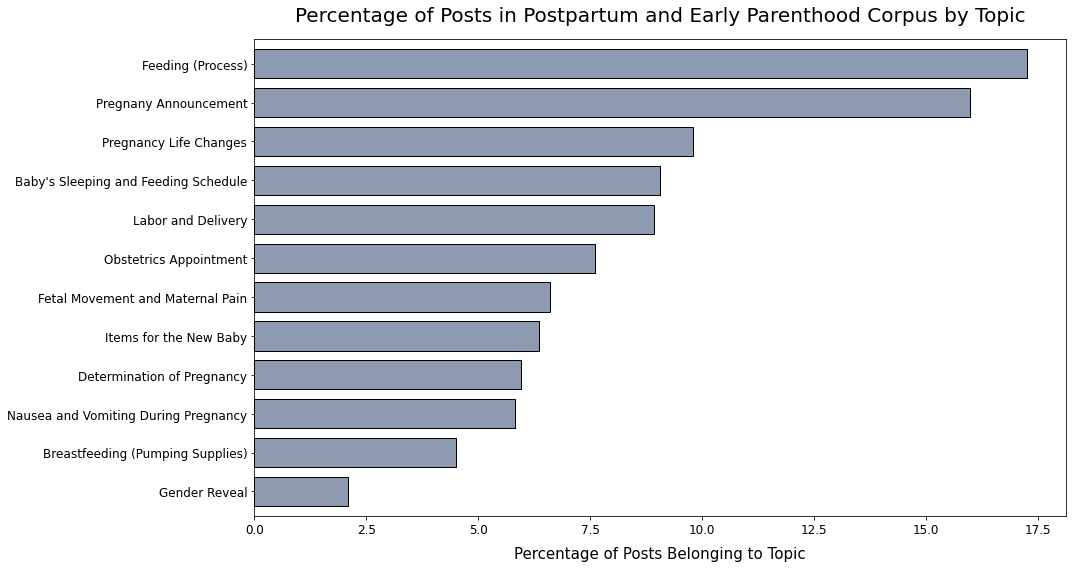

In [208]:
plot_topics_in_corpus(pospar_topic_df, 
                      'Dominant_Topic', 
                       warm_grey,
                       title = 'Percentage of Posts in Postpartum and Early Parenthood Corpus by Topic',
                       x_label = 'Percentage of Posts Belonging to Topic')

In [173]:
pospar_posts_dict, pospar_dominance_dict = get_top_posts(pospar_topic_df)
top_pospar_posts_df = pd.DataFrame.from_dict({'Most Representative Post': pospar_posts_dict, 'Percent_Dominant': pospar_dominance_dict})

top_pospar_posts_df

,Most Representative Post,Percent_Dominant
Breastfeeding (Pumping Supplies),Book Recommendations and Must Reads? Sorry if ...,0.8787
Items for the New Baby,"Our tiny, star/solar system themed baby girl n...",0.8870
Fetal Movement and Maternal Pain,Some tips for SPD sufferers! I had my first PT...,0.8839
Feeding (Process),Breastfeeding Story - the first weeks Hi ever...,0.9280
Nausea and Vomiting During Pregnancy,Hormones causing symptoms during breastfeeding...,0.8924
Gender Reveal,Introduction: New Mommy! Hello everyone! I’m n...,0.8424
Labor and Delivery,"Birth Story (and notes/suggestions) - FTM, ind...",0.9459
Pregnany Announcement,Some Psychological/Emotional Advice for New E...,0.9369
Obstetrics Appointment,Growth scan concerns and follow up Hi BB's!Wan...,0.9284
Pregnancy Life Changes,Looking for hot-takes from second time self-em...,0.9198


## Conclusions and Recommendations